# Simulación de Decisiones Clínicas con Aprendizaje por Refuerzo

**Objetivo:**  
En este notebook, implementaremos una simulación básica de decisiones clínicas utilizando técnicas de **Aprendizaje por Refuerzo**. Crearemos un entorno simulado donde un agente aprenderá a seleccionar el mejor tratamiento para pacientes, basándose en las recompensas obtenidas de los resultados de salud.

**Requisitos previos:**  
No se asume experiencia previa en programación o en aprendizaje por refuerzo. Se proporcionarán explicaciones detalladas y comentarios en el código.

## Contenido

1. [Introducción al Aprendizaje por Refuerzo](#1)
2. [Definición del Entorno Simulado](#2)
3. [Implementación del Agente](#3)
4. [Algoritmo de Aprendizaje (Q-Learning)](#4)
5. [Entrenamiento del Agente](#5)
6. [Evaluación y Visualización de Resultados](#6)
7. [Conclusiones y Reflexiones](#7)
8. [Recursos Adicionales](#8)

## 1. Introducción al Aprendizaje por Refuerzo <a name="1"></a>

El **Aprendizaje por Refuerzo** es una rama del aprendizaje automático donde un agente aprende a tomar decisiones mediante interacción con un entorno. El objetivo del agente es aprender una **política** que maximice las **recompensas** acumuladas a lo largo del tiempo.

**Componentes Clave:**

- **Agente:** Toma acciones en el entorno.
- **Entorno:** Responde a las acciones del agente con estados y recompensas.
- **Acciones:** Opciones disponibles que el agente puede elegir.
- **Estados:** Situación actual en la que se encuentra el agente.
- **Recompensas:** Retroalimentación numérica recibida después de tomar una acción.

## 2. Definición del Entorno Simulado <a name="2"></a>

Simularemos un entorno clínico simple donde:

- Los pacientes pueden presentar diferentes **estados de salud**.
- El agente (médico) puede elegir entre varios **tratamientos**.
- Cada tratamiento tiene un efecto probabilístico en el estado de salud del paciente.
- El objetivo es **maximizar la salud** de los pacientes a lo largo del tiempo.

### 2.1. Importar Librerías Necesarias

In [ ]:
# Instalación de paquetes necesarios (ejecutar si es necesario)
!pip install numpy matplotlib seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de los gráficos
%matplotlib inline
sns.set(style="whitegrid")

### 2.2. Definir los Estados y Acciones

- **Estados:** Representan el estado de salud del paciente.
  - `0`: Estado crítico
  - `1`: Estado intermedio
  - `2`: Estado saludable

- **Acciones:** Tratamientos disponibles.
  - `0`: Tratamiento A
  - `1`: Tratamiento B

In [2]:
# Definir estados y acciones
states = [0, 1, 2]          # 0: Crítico, 1: Intermedio, 2: Saludable
actions = [0, 1]            # 0: Tratamiento A, 1: Tratamiento B

### 2.3. Matriz de Transición de Estados

Definimos cómo las acciones afectan al estado de salud del paciente. Utilizaremos probabilidades de transición para cada combinación de estado y acción.

In [3]:
# Matriz de transición [estado_actual][acción][estado_siguiente] = probabilidad
transition_probabilities = {
    0: {  # Estado crítico
        0: [0.5, 0.4, 0.1],  # Tratamiento A
        1: [0.7, 0.2, 0.1]   # Tratamiento B
    },
    1: {  # Estado intermedio
        0: [0.1, 0.6, 0.3],
        1: [0.2, 0.5, 0.3]
    },
    2: {  # Estado saludable
        0: [0.0, 0.1, 0.9],
        1: [0.0, 0.2, 0.8]
    }
}

### 2.4. Definir Recompensas

- **Recompensa positiva** cuando el paciente mejora su estado de salud.
- **Recompensa negativa** cuando el paciente empeora.

In [4]:
# Matriz de recompensas [estado_actual][acción][estado_siguiente] = recompensa
rewards = {
    0: {  # Estado crítico
        0: [-1, 0, 10],  # Tratamiento A
        1: [-2, 0, 10]   # Tratamiento B
    },
    1: {  # Estado intermedio
        0: [-1, 0, 5],
        1: [-1, 0, 5]
    },
    2: {  # Estado saludable
        0: [0, 0, 0],
        1: [0, 0, 0]
    }
}

## 3. Implementación del Agente <a name="3"></a>

Utilizaremos una **tabla Q** para que el agente almacene los valores esperados de cada acción en cada estado.

### 3.1. Inicializar la Tabla Q

In [5]:
# Inicializar la tabla Q con ceros
Q_table = np.zeros((len(states), len(actions)))
print("Tabla Q inicial:")
print(Q_table)

Tabla Q inicial:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


## 4. Algoritmo de Aprendizaje (Q-Learning) <a name="4"></a>

El **Q-Learning** es un algoritmo de aprendizaje por refuerzo que permite al agente aprender los valores óptimos de las acciones en cada estado.

### 4.1. Definir Parámetros del Algoritmo

- **alpha:** Tasa de aprendizaje.
- **gamma:** Factor de descuento (importancia de futuras recompensas).
- **epsilon:** Parámetro para la estrategia epsilon-greedy (exploración vs. explotación).

In [6]:
alpha = 0.1      # Tasa de aprendizaje
gamma = 0.9      # Factor de descuento
epsilon = 0.1    # Probabilidad de exploración
episodes = 1000  # Número de episodios de entrenamiento

## 5. Entrenamiento del Agente <a name="5"></a>

El agente interactuará con el entorno durante un número determinado de episodios, actualizando la tabla Q en cada paso.

In [8]:
# Lista para almacenar recompensas totales por episodio
rewards_per_episode = []

for episode in range(episodes):
    state = np.random.choice(states)  # Estado inicial aleatorio
    total_rewards = 0
    
    while state != 2:  # Continuar hasta que el paciente esté saludable
        # Decidir acción (epsilon-greedy)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(actions)  # Explorar
        else:
            action = np.argmax(Q_table[state, :])  # Explotar conocimiento
        
        # Obtener las probabilidades y recompensas para el estado actual
        probs = transition_probabilities[state][action]
        reward_options = rewards[state][action]
        
        # Determinar el próximo estado
        next_state = np.random.choice(states, p=probs)
        
        # Obtener la recompensa correspondiente
        reward = reward_options[next_state]
        
        # Actualizar la tabla Q
        old_value = Q_table[state, action]
        next_max = np.max(Q_table[next_state, :])
        
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        Q_table[state, action] = new_value
        
        # Actualizar el estado y recompensas
        state = next_state
        total_rewards += reward
    
    rewards_per_episode.append(total_rewards)

## 6. Evaluación y Visualización de Resultados <a name="6"></a>

### 6.1. Visualizar la Evolución de las Recompensas

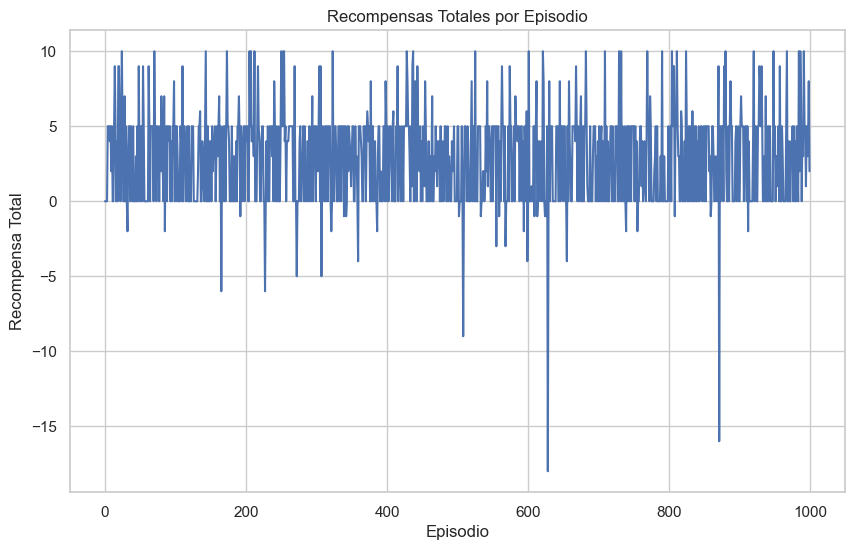

In [9]:
# Gráfico de recompensas acumuladas por episodio
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_episode)
plt.title('Recompensas Totales por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

### 6.2. Mostrar la Tabla Q Final

In [10]:
print("Tabla Q final:")
print(Q_table)

Tabla Q final:
[[3.39766424 2.788833  ]
 [3.31356688 4.17717513]
 [0.         0.        ]]


### 6.3. Extraer la Política Óptima

La política óptima es seleccionar la acción con el mayor valor Q en cada estado.

In [11]:
optimal_policy = {}
action_names = {0: 'Tratamiento A', 1: 'Tratamiento B'}
state_names = {0: 'Crítico', 1: 'Intermedio', 2: 'Saludable'}

for state in states:
    action = np.argmax(Q_table[state, :])
    optimal_policy[state_names[state]] = action_names[action]

print("Política Óptima Aprendida:")
for state, action in optimal_policy.items():
    print(f"En estado {state}: {action}")

Política Óptima Aprendida:
En estado Crítico: Tratamiento A
En estado Intermedio: Tratamiento B
En estado Saludable: Tratamiento A


## 7. Conclusiones y Reflexiones <a name="7"></a>

- **Aprendizaje del Agente:** El agente ha aprendido a seleccionar el tratamiento que maximiza la recuperación del paciente.
- **Importancia del Aprendizaje por Refuerzo en Salud:** Puede utilizarse para optimizar decisiones clínicas, personalizar tratamientos y mejorar resultados de salud.
- **Consideraciones Éticas:** Es crucial asegurar que las decisiones automatizadas sean seguras, efectivas y equitativas.

**Próximos Pasos:**

- **Complejidad del Entorno:** Ampliar el entorno para incluir más estados y acciones.
- **Algoritmos Avanzados:** Explorar técnicas más avanzadas como Deep Q-Learning.
- **Validación Clínica:** Colaborar con profesionales de la salud para validar y ajustar el modelo.

## 8. Recursos Adicionales <a name="8"></a>

- **Introducción al Aprendizaje por Refuerzo:** [Artículo en Wikipedia](https://es.wikipedia.org/wiki/Aprendizaje_por_refuerzo)
- **Documentación de NumPy:** [https://numpy.org/doc/](https://numpy.org/doc/)
- **Tutorial de Q-Learning:** [Reinforcement Learning with Python](https://www.geeksforgeeks.org/q-learning-in-python/)